# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [8]:
print(app_train['DAYS_BIRTH'].corr(app_train['TARGET']))
(app_train['DAYS_BIRTH']/365).describe()

-0.07823930830982712


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [18]:
app_data = app_train[['DAYS_BIRTH','TARGET']]
app_data['YEARS_BIRTH'] = app_data['DAYS_BIRTH']/365
app_data['YEARS_BINNED'] = pd.cut(app_data['YEARS_BIRTH'],np.linspace(20,70,11))


app_data

<ipython-input-18-58ae94f37aed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_data['YEARS_BIRTH'] = app_data['DAYS_BIRTH']/365
<ipython-input-18-58ae94f37aed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_data['YEARS_BINNED'] = pd.cut(app_data['YEARS_BIRTH'],np.linspace(20,70,11))


,DAYS_BIRTH,TARGET,YEARS_BIRTH,YEARS_BINNED
0,9461,1,25.920548,"(25.0, 30.0]"
1,16765,0,45.931507,"(45.0, 50.0]"
2,19046,0,52.180822,"(50.0, 55.0]"
3,19005,0,52.068493,"(50.0, 55.0]"
4,19932,0,54.608219,"(50.0, 55.0]"
...,...,...,...,...
307506,9327,0,25.553425,"(25.0, 30.0]"
307507,20775,0,56.917808,"(55.0, 60.0]"
307508,14966,0,41.002740,"(40.0, 45.0]"
307509,11961,1,32.769863,"(30.0, 35.0]"


In [20]:
age_group = app_data.groupby('YEARS_BINNED').mean()
age_group

,DAYS_BIRTH,TARGET,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",8532.795625,0.123036,23.377522
"(25.0, 30.0]",10155.219250,0.111436,27.822518
"(30.0, 35.0]",11854.848377,0.102814,32.479037
"(35.0, 40.0]",13707.908253,0.089414,37.555913
"(40.0, 45.0]",15497.661233,0.078491,42.459346
"(45.0, 50.0]",17323.900441,0.074171,47.462741
"(50.0, 55.0]",19196.494791,0.066968,52.593136
"(55.0, 60.0]",20984.262742,0.055314,57.491131
"(60.0, 65.0]",22780.547460,0.052737,62.412459


([<matplotlib.axis.XTick at 0x223bb6c24c0>,
 [Text(0, 0, '(20.0, 25.0]'),
  Text(0, 0, '(25.0, 30.0]'),
  Text(0, 0, '(30.0, 35.0]'),
  Text(0, 0, '(35.0, 40.0]'),
  Text(0, 0, '(40.0, 45.0]'),
  Text(0, 0, '(45.0, 50.0]'),
  Text(0, 0, '(50.0, 55.0]'),
  Text(0, 0, '(55.0, 60.0]'),
  Text(0, 0, '(60.0, 65.0]'),
  Text(0, 0, '(65.0, 70.0]')])

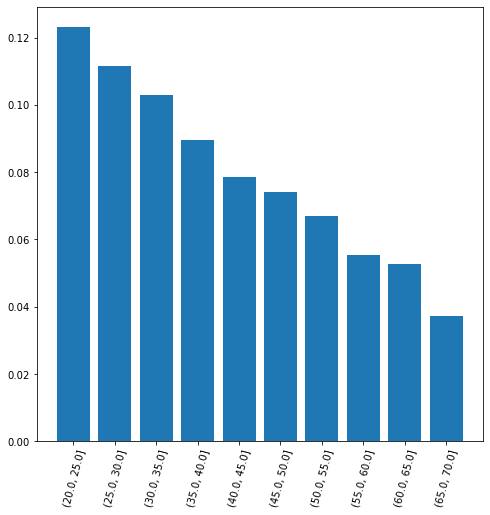

In [23]:
plt.figure(figsize= (8,8))
plt.bar(range(len(age_group.index)), age_group['TARGET'])
plt.xticks(range(len(age_group.index)), age_group.index, rotation = 75)